Langchain Basics
  - LangChain is a robust library designed to simplify interactions with various large language model (LLM) providers
  - Has ability to create Chains, and logical connections that help in bridging one or multiple LLMs
  - Central to LangChain is a vital component known as LangChain Chains, forming the core connection among one or several LLMs
  - These Chains empower us to integrate numerous components, weaving them into a cohesive application

Crafting Chains – Sequential Chains


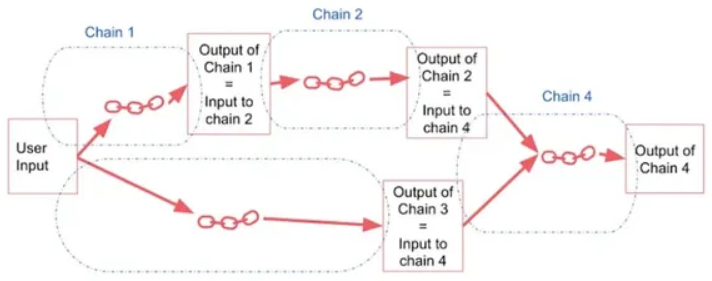

In [ ]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import ChatPromptTemplate
from langchain.chains import SequentialChain

llm = OpenAI(temperature=0.7, openai_api_key="sgfegeagggg")

In [ ]:
Review = '''Les ordinateurs portables GamersTech impressionne par ses
 performances exceptionnelles et son design élégant. De sa configuration 
 matérielle robuste à un clavier RVB personnalisable et un système de 
 refroidissement efficace, il établit un équilibre parfait entre prouesses 
 de jeu et portabilité '''

# prompt template 1: translate to English
first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)

# chain 1: input= Review and output= English_Review
chain_one = LLMChain(llm=llm, prompt=first_prompt, output_key="English_Review")

In [ ]:
# prompt template 2: Summarize the English review
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"   # output_key="English_Review" output from chain_one
)

# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=llm, prompt=second_prompt, output_key="summary")

In [ ]:
# prompt template 3: translate to English
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}")

# chain 3: input= Review and output= language
chain_three = LLMChain(llm=llm, prompt=third_prompt, output_key="language")

In [ ]:
# prompt template 4: follow up message
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)

# chain 4: input= summary, language and output= followup_message
chain_four = LLMChain(llm=llm, prompt=fourth_prompt, output_key="followup_message")

In [ ]:

overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

overall_chain(Review)